In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import base64
import sklearn
import skcriteria as skc

In [3]:
#load the csv file and read in
csv_data = pd.read_csv('final_df.csv')

# Read the values of the file in the dataframe
df = pd.DataFrame(csv_data)

In [4]:
df

,country,year,social_progress_index,deaths_from_interpersonal_violence,perceived_criminality,media_censorship,access_to_justice,freedom_of_expression,freedom_of_religion,discrimination_and_violence_against_minorities,...,respect,safety_walking_alone_night,satisfaction_with_freedom,satisfaction_with_public_transportation,terrorism_incidents,twosided_conflict_deaths,digital_payments,womens_agency,_merge,area_group
0,Albania,2021,0.7451,1.9836,0.8,0.33700,0.906,0.687,0.92700,0.41,...,0.72,0.6000,0.674778,0.481697,0.900225,1.0,0.288224,0.4375,both,Eastern Europe
1,Albania,2020,0.7380,2.0420,0.8,0.45275,0.906,0.707,0.92700,0.44,...,0.84,0.5375,0.713099,0.540268,0.852441,1.0,0.200112,0.4375,both,Eastern Europe
2,Albania,2019,0.7418,2.0796,0.8,0.45275,0.852,0.723,0.96600,0.43,...,0.84,0.5750,0.772754,0.627890,0.838197,1.0,0.200112,0.4375,both,Eastern Europe
3,Albania,2018,0.7393,2.1282,0.8,0.59175,0.852,0.818,0.93475,0.42,...,0.78,0.5000,0.675039,0.551790,0.824318,1.0,0.200112,0.4375,both,Eastern Europe
4,Albania,2017,0.7390,2.1680,0.8,0.59175,0.904,0.784,0.97475,0.45,...,0.78,0.5250,0.645759,0.485045,0.838303,1.0,0.200112,0.4375,both,Eastern Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2261,Venezuela,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.88,0.0750,0.504051,0.000000,0.918086,1.0,0.490736,0.6250,right_only,Latin America and the Caribbean
2262,Afghanistan,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0000,0.228642,0.342710,0.000000,0.0,0.055705,0.0625,right_only,Asia-Pacific
2263,Venezuela,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.92,0.1125,0.526525,0.167664,0.908660,1.0,0.490736,0.6250,right_only,Latin America and the Caribbean
2264,Afghanistan,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0000,0.228642,0.342710,0.000000,0.0,0.108268,0.0625,right_only,Asia-Pacific


In [5]:
#select random sample of countries to test algorithms
#set random number generator to a fixed start point so you get the same information back when you re-run the random sample generator
sample= df.sample(10,random_state=42)
#select subset of features
country_df = sample[['country', 'intentional_homicides', 'property_stolen', 'safety_walking_alone_night', 'terrorism_incidents','twosided_conflict_deaths']]
country_df.set_index('country')

,intentional_homicides,property_stolen,safety_walking_alone_night,terrorism_incidents,twosided_conflict_deaths
country,,,,,
Botswana,0.303003,0.20,0.2000,1.000000,1.000000
Israel,0.753461,0.76,0.7125,0.165553,0.226447
Suriname,0.442087,0.76,0.5000,1.000000,1.000000
Mexico,0.178750,0.50,0.2625,0.949887,0.325184
Haiti,0.400219,0.58,0.3375,0.993906,1.000000
Fiji,NaN,NaN,NaN,NaN,NaN
Malawi,0.741512,0.26,0.2375,1.000000,1.000000
United States,0.536287,0.70,0.6500,0.947345,1.000000
Mongolia,0.512801,0.56,0.3625,1.000000,1.000000


In [6]:
#dropna due to error in sum scaler to normalize values after inverting minimizer
country_df= country_df.dropna()

In [7]:
#weidghts roughly based on original data set weights and my opinion
#intentional homicides- homicides/100,000 pop-----2--- .25   
#property stolen- percentage of 'yes'-------2---.25
#safety walking alone- percentage of 'yes'-------1---.30
#terrorism incidents- incidents per 1,000,000-----.25--- .10
#two-sided conflict is death rate per 1,000,000 population ----0.5---.10

In [8]:
#create matrix vector by converting to 2D array-like
col_matrix = country_df[['intentional_homicides', 'property_stolen', 'safety_walking_alone_night', 'terrorism_incidents','twosided_conflict_deaths']]
matrix = col_matrix.values
matrix

array([[0.30300284, 0.2       , 0.2       , 1.        , 1.        ],
       [0.7534614 , 0.76      , 0.7125    , 0.16555266, 0.22644702],
       [0.44208672, 0.76      , 0.5       , 1.        , 1.        ],
       [0.17874987, 0.5       , 0.2625    , 0.94988693, 0.32518426],
       [0.40021911, 0.58      , 0.3375    , 0.99390597, 1.        ],
       [0.74151198, 0.26      , 0.2375    , 1.        , 1.        ],
       [0.53628691, 0.7       , 0.65      , 0.94734477, 1.        ],
       [0.51280075, 0.56      , 0.3625    , 1.        , 1.        ],
       [0.46557534, 0.56      , 0.4       , 0.9676826 , 1.        ]])

In [9]:
#define alternatives
alt = country_df.country

In [10]:
#vector of criteria
# for maximization and minimization of the components of objective vector to scale between 0 and 1. This normalizes the values
#benefit- value/max value --maximize the benefit
#non-beneficial - minvalue/value --minimize the non-benefit
objectives = [min, min, max, min, min]
objectives

[<function min>,
 <function min>,
 <function max>,
 <function min>,
 <function min>]

In [11]:
#apply built-in decision matrix function to create decision matrix object
#10 alternatives x 5 criteria
#apply weights if applicable
dm = skc.mkdm(
    matrix,
    objectives, #direction of goodness for each column
    weights = [0.25, 0.25, .30, .10, .10],
    alternatives = alt,
    criteria=['intentional_homicides', 'property_stolen', 'safety_walking_alone_night', 'terrorism_incidents', 'twosided_conflict_deaths'] #feature/column name
)
dm

intentional_homicides[▼ 0.25] property_stolen[▼ 0.25]  \
Botswana                           0.303003                    0.20   
Israel                             0.753461                    0.76   
Suriname                           0.442087                    0.76   
Mexico                             0.178750                    0.50   
Haiti                              0.400219                    0.58   
Malawi                             0.741512                    0.26   
United States                      0.536287                    0.70   
Mongolia                           0.512801                    0.56   
Zimbabwe                           0.465575                    0.56   

              safety_walking_alone_night[▲ 0.30] terrorism_incidents[▼ 0.10]  \
Botswana                                  0.2000                    1.000000   
Israel                                    0.7125                    0.165553   
Suriname                                  0.5000                    1.000000   
Mexico                                    0.2625                    0.949887   
Haiti                                     0.3375                    0.993906   
Malawi                                    0.2375                    1.000000   
United States                             0.6500                    0.947345   
Mongolia                                  0.3625                    1.000000   
Zimbabwe                                  0.4000                    0.967683   

              twosided_conflict_deaths[▼ 0.10]  
Botswana                              1.000000  
Israel                                0.226447  
Suriname                              1.000000  
Mexico                                0.325184  
Haiti                                 1.000000  
Malawi                                1.000000  
United States                         1.000000  
Mongolia                              1.000000  
Zimbabwe                              1.000000  
[9 Alternatives x 5 Criteria]

In [12]:
dm.matrix

,intentional_homicides,property_stolen,safety_walking_alone_night,terrorism_incidents,twosided_conflict_deaths
Botswana,0.303003,0.20,0.2000,1.000000,1.000000
Israel,0.753461,0.76,0.7125,0.165553,0.226447
Suriname,0.442087,0.76,0.5000,1.000000,1.000000
Mexico,0.178750,0.50,0.2625,0.949887,0.325184
Haiti,0.400219,0.58,0.3375,0.993906,1.000000
Malawi,0.741512,0.26,0.2375,1.000000,1.000000
United States,0.536287,0.70,0.6500,0.947345,1.000000
Mongolia,0.512801,0.56,0.3625,1.000000,1.000000
Zimbabwe,0.465575,0.56,0.4000,0.967683,1.000000


In [13]:
dm.objectives

intentional_homicides         MIN
property_stolen               MIN
safety_walking_alone_night    MAX
terrorism_incidents           MIN
twosided_conflict_deaths      MIN
Name: Objectives, dtype: object

In [14]:
dm.alternatives, dm.criteria

(_ACArray(['Botswana', 'Israel', 'Suriname', 'Mexico', 'Haiti', 'Malawi',
           'United States', 'Mongolia', 'Zimbabwe'], dtype=object),
 _ACArray(['intentional_homicides', 'property_stolen',
           'safety_walking_alone_night', 'terrorism_incidents',
           'twosided_conflict_deaths'], dtype=object))

<AxesSubplot:xlabel='Criteria', ylabel='Alternatives'>

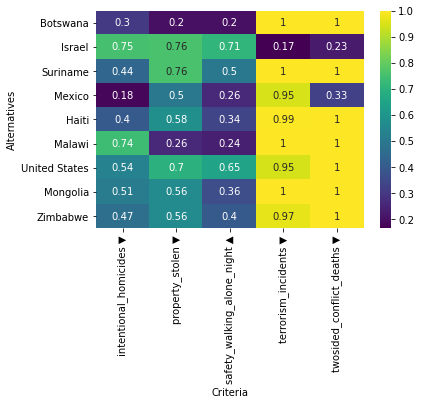

In [15]:
#heatmap to visualize data
dm.plot()

<AxesSubplot:ylabel='Density'>

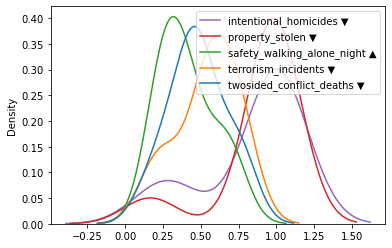

In [19]:
#density plot
dm.plot.kde()

<AxesSubplot:xlabel='Alternatives'>

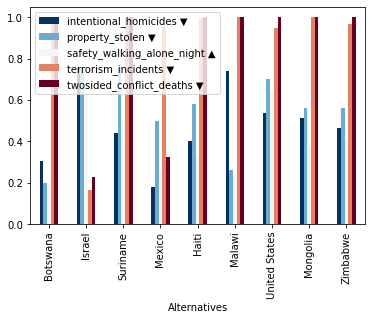

In [17]:
#barplot
dm.plot.bar(cmap="RdBu_r")

In [226]:
#transform data for analysis to avoid errors from using minimizing objects--scikit criteria prefers maximize objects

#first invert minimizing objectives by dividing out inverse of each criterion value -- [1/Cj]
#second divide each criterion value by total sum of criteria, normalizing into range [0,1]

#import necessary modules
from skcriteria.preprocessing import invert_objectives, scalers

In [227]:
#Invert minimizing objects
#create transformer and store in inverter variable
#apply transformation by calling transform method of the transformer and pass as parameter in dm

inverter = invert_objectives.MinimizeToMaximize()
dmt=inverter.transform(dm)
dmt

intentional_homicides[▲ 0.25] property_stolen[▲ 0.25]  \
Botswana                           3.300299                5.000000   
Israel                             1.327208                1.315789   
Suriname                           2.262000                1.315789   
Mexico                             5.594410                2.000000   
Haiti                              2.498631                1.724138   
Malawi                             1.348596                3.846154   
United States                      1.864674                1.428571   
Mongolia                           1.950075                1.785714   
Zimbabwe                           2.147880                1.785714   

              safety_walking_alone_night[▲ 0.30] terrorism_incidents[▲ 0.10]  \
Botswana                                  0.2000                    1.000000   
Israel                                    0.7125                    6.040374   
Suriname                                  0.5000                    1.000000   
Mexico                                    0.2625                    1.052757   
Haiti                                     0.3375                    1.006131   
Malawi                                    0.2375                    1.000000   
United States                             0.6500                    1.055582   
Mongolia                                  0.3625                    1.000000   
Zimbabwe                                  0.4000                    1.033397   

              twosided_conflict_deaths[▲ 0.10]  
Botswana                              1.000000  
Israel                                4.416044  
Suriname                              1.000000  
Mexico                                3.075180  
Haiti                                 1.000000  
Malawi                                1.000000  
United States                         1.000000  
Mongolia                              1.000000  
Zimbabwe                              1.000000  
[9 Alternatives x 5 Criteria]

In [228]:
#scale values to normalize
#create transformer and store in inverter variable--scalers support target paramter- use both to normalize both matrix and weights
#apply transormation by calling transform method of transformer and pass as dmt
#save and overwrite variable dmt
scaler = scalers.SumScaler(target='both')
dmt=scaler.transform(dmt)
dmt

intentional_homicides[▲ 0.25] property_stolen[▲ 0.25]  \
Botswana                           0.148037                0.247502   
Israel                             0.059533                0.065132   
Suriname                           0.101463                0.065132   
Mexico                             0.250940                0.099001   
Haiti                              0.112078                0.085345   
Malawi                             0.060492                0.190386   
United States                      0.083641                0.070715   
Mongolia                           0.087472                0.088394   
Zimbabwe                           0.096344                0.088394   

              safety_walking_alone_night[▲ 0.30] terrorism_incidents[▲ 0.10]  \
Botswana                                0.054608                    0.070481   
Israel                                  0.194539                    0.425731   
Suriname                                0.136519                    0.070481   
Mexico                                  0.071672                    0.074199   
Haiti                                   0.092150                    0.070913   
Malawi                                  0.064846                    0.070481   
United States                           0.177474                    0.074398   
Mongolia                                0.098976                    0.070481   
Zimbabwe                                0.109215                    0.072835   

              twosided_conflict_deaths[▲ 0.10]  
Botswana                              0.069007  
Israel                                0.304739  
Suriname                              0.069007  
Mexico                                0.212210  
Haiti                                 0.069007  
Malawi                                0.069007  
United States                         0.069007  
Mongolia                              0.069007  
Zimbabwe                              0.069007  
[9 Alternatives x 5 Criteria]

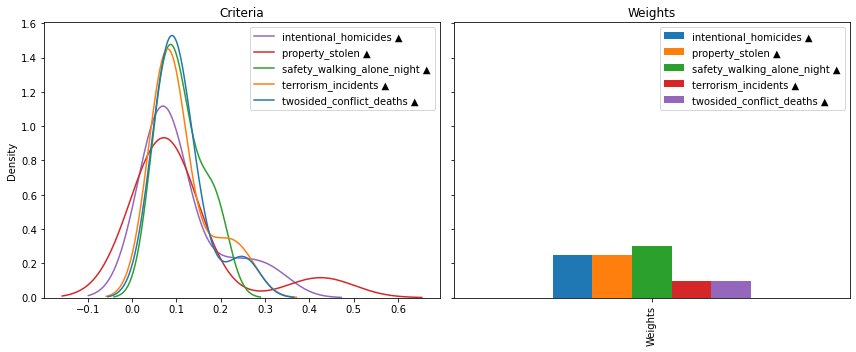

In [229]:
#graph for matrix

#create 2 axis with same y axis
fig, axs = plt.subplots(1,2, figsize=(12, 5), sharey=True) 

#first axis- plot criteria KDE
dmt.plot.kde(ax=axs[0])
axs[0].set_title('Criteria')

#second axis- plot weights as bars
dmt.plot.wbar(ax=axs[1])
axs[1].set_title('Weights')

#adjust layout of figure
fig.tight_layout()

In [230]:
#algorithms for MCDA methods

#import required module
from skcriteria.madm import simple

In [231]:
#MCDA method #1 Weighted Sum Model

#create decision maker and sotre in a variable
#execute evaluate method inside decition maker to create result
#store in variable

wsm_dec = simple.WeightedSumModel()
wsm_rank = wsm_dec.evaluate(dmt)
wsm_rank

,Botswana,Israel,Suriname,Mexico,Haiti,Malawi,United States,Mongolia,Zimbabwe
Rank,3,1,5,2,8,6,4,9,7


In [232]:
#access scores
wsm_rank.e_.score

array([0.12921573, 0.16257498, 0.09655329, 0.13762791, 0.09099284,
       0.09612226, 0.10617184, 0.08760797, 0.09313318])

In [233]:
#access ranks
wsm_rank.rank_

array([3, 1, 5, 2, 8, 6, 4, 9, 7])

In [234]:
#MCDA method #2 Weighted Product Model --sum of log

wpm_dec = simple.WeightedProductModel()
wpm_rank = wpm_dec.evaluate(dmt)
wpm_rank

,Botswana,Israel,Suriname,Mexico,Haiti,Malawi,United States,Mongolia,Zimbabwe
Rank,3,1,5,2,7,9,4,8,6


WPM prefers the alternative **Isreal** over all other alternatives

In [235]:
#access scores
wpm_rank.e_.score

array([-0.96914061, -0.90485391, -1.0357197 , -0.92487573, -1.04651429,
       -1.07240423, -1.01123105, -1.0605722 , -1.03583023])

In [236]:
#access ranks
wpm_rank.rank_

array([3, 1, 5, 2, 7, 9, 4, 8, 6])

In [237]:
#MCDA method #3 Technique for Order of Preference by Similarity to Ideal Solution -TOPSIS

#import modules
from skcriteria.madm import similarity
from skcriteria.pipeline import mkpipe

In [238]:
#pipelines combines one or several transformers and one decision-maker to execute experiment
pipe = mkpipe(
    invert_objectives.MinimizeToMaximize(),
    scalers.VectorScaler(target='matrix'),  #transforms matrix
    scalers.SumScaler(target='weights'),  #transforms weights
    similarity.TOPSIS(),
)

pipe

SKCPipeline(steps=[('minimizetomaximize', MinimizeToMaximize()), ('vectorscaler', VectorScaler(target='matrix')), ('sumscaler', SumScaler(target='weights')), ('topsis', TOPSIS(metric='euclidean'))])

In [239]:
#execute three transformers and evaluator to obtain ranks
topsis_rank = pipe.evaluate(dm)
topsis_rank

,Botswana,Israel,Suriname,Mexico,Haiti,Malawi,United States,Mongolia,Zimbabwe
Rank,3,1,6,2,8,5,4,9,7


In [240]:
print(topsis_rank.e_)
print('Ideal:', topsis_rank.e_.ideal) #better alternatives
print('Anti-Ideal:', topsis_rank.e_.anti_ideal) #worst alternatives
print('Similarity index:', topsis_rank.e_.similarity) #how far from anti-ideal and how close to ideal are the real alternatives

extra({'similarity', 'anti_ideal', 'ideal'})
Ideal: [0.16834441 0.16322583 0.16154376 0.09025655 0.07364353]
Anti-Ideal: [0.03993773 0.04295417 0.04534562 0.01494221 0.01667636]
Similarity index: [0.448579   0.4597677  0.28018021 0.45653325 0.20438938 0.29803
 0.35529457 0.18396723 0.22201891]


In [241]:
#combine methods 1 & 2 for one output

#make copy of dataset
country_copy = country_df.copy()

#WSM method
wsm_dec = simple.WeightedSumModel()
wsm_rank = wsm_dec.evaluate(dmt)
country_copy.loc[:, 'rank_weightedSum']=wsm_rank.rank_
country_copy.loc[:,'score_weightedSum']= wsm_rank.e_.score

#WPM methed
wpm_dec = simple.WeightedProductModel()
wpm_rank = wpm_dec.evaluate(dmt)
country_copy.loc[:, 'rank_weightedProduct']=wpm_rank.rank_ 
country_copy.loc[:,'score_weightedProduct']= wpm_rank.e_.score

country_copy

,country,intentional_homicides,property_stolen,safety_walking_alone_night,terrorism_incidents,twosided_conflict_deaths,rank_weightedSum,score_weightedSum,rank_weightedProduct,score_weightedProduct
188,Botswana,0.303003,0.20,0.2000,1.000000,1.000000,3,0.129216,3,-0.969141
809,Israel,0.753461,0.76,0.7125,0.165553,0.226447,1,0.162575,1,-0.904854
1583,Suriname,0.442087,0.76,0.5000,1.000000,1.000000,5,0.096553,5,-1.035720
1090,Mexico,0.178750,0.50,0.2625,0.949887,0.325184,2,0.137628,2,-0.924876
674,Haiti,0.400219,0.58,0.3375,0.993906,1.000000,8,0.090993,7,-1.046514
1017,Malawi,0.741512,0.26,0.2375,1.000000,1.000000,6,0.096122,9,-1.072404
1762,United States,0.536287,0.70,0.6500,0.947345,1.000000,4,0.106172,4,-1.011231
1113,Mongolia,0.512801,0.56,0.3625,1.000000,1.000000,9,0.087608,8,-1.060572
1840,Zimbabwe,0.465575,0.56,0.4000,0.967683,1.000000,7,0.093133,6,-1.035830


In [242]:
wpm_rank.e_.score

array([-0.96914061, -0.90485391, -1.0357197 , -0.92487573, -1.04651429,
       -1.07240423, -1.01123105, -1.0605722 , -1.03583023])